# Logistic Regression with Kaggle Titanic data set

## Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!git clone https://github.com/TheBrainCodeGames/2021_seminars.git

fatal: destination path '2021_seminars' already exists and is not an empty directory.


In [3]:
train = pd.read_csv('/content/2021_seminars/AI/Datasets/titanic_train.csv')
test = pd.read_csv('/content/2021_seminars/AI/Datasets/titanic_test.csv')

data = pd.concat([train, test], sort=True).reset_index(drop=True)

data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Check basic info about the data set including missing value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [5]:
d = data.describe()
d

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


## Exploratory analysis and plots

In [6]:
# survival info is not present in the test dataset!

survivors = data.loc[data.Survived == 1, 'Survived'].count()
casualties = data.loc[data.Survived == 0, 'Survived'].count()

print(f'From {survivors + casualties} passengers, {survivors} survived, that makes a survival rate of {round(100*(survivors/(survivors+casualties)), 2)}%')

From 891 passengers, 342 survived, that makes a survival rate of 38.38%


**Plot a bar diagram to check the number of numeric entries**

From the bar diagram, it shows that there are some age entries missing as the number of count for 'Age' is less than the other counts. We can do some impute/transformation of the data to fill-up the missing entries.

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

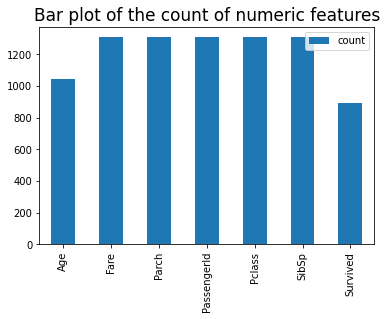

In [7]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

**Check the relative size of survived and not-survived**

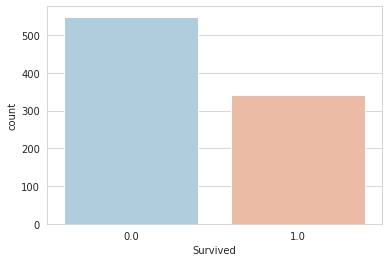

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')

**Is there a pattern for the survivability based on sex?**

It looks like more female survived than males!

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

**What about any pattern related to passenger class?**

It looks like disproportionately large number of 3rd class passengers died!

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

**Following code extracts and plots the fraction of passenger count that survived, by each class**

In [ ]:
f_class_survived=data.groupby('Pclass')['Survived'].mean()
f_class_survived = pd.DataFrame(f_class_survived)
print(f_class_survived)
f_class_survived.plot.bar(y='Survived')
plt.title("Fraction of passengers survived by class",fontsize=17)

**How does the overall age distribution look like?**

In [ ]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
data['Age'].hist(bins=30,color='darkred',alpha=0.7,figsize=(10,6))

**How does the age distribution look like across passenger class?**

It looks like that the average age is different for three classes and it generally decreases from 1st class to 3rd class.

In [ ]:
plt.figure(figsize=(12, 10))
plt.xlabel("Passenger Class",fontsize=18)
plt.ylabel("Age",fontsize=18)
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [ ]:
f_class_Age=data.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class", fontsize=17)

## Data wrangling (impute and drop)
* Impute age (by averaging)
* Drop unncessary features
* Convert categorical features to dummy variables

### Impute (fill-up missing values) age feature

In [9]:
data['Age'] = data.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

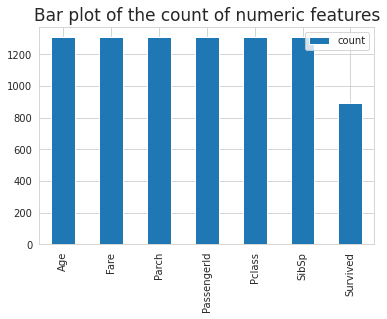

In [10]:
d=data.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

### Impute the missing Fare and Embarked


In [11]:
data.loc[data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [12]:
impute_one_fare = data.loc[(data['Pclass'] == 3) & (data['Embarked'] == 'S') & (data['SibSp'] == 0)]['Fare'].median()

data.loc[data['Fare'].isnull(), 'Fare'] = impute_one_fare

In [13]:
data.loc[data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [14]:
data.loc[data['Embarked'].isnull(), 'Embarked'] = 'S'

### Drop features like 'Cabin', 'PassengerId', 'Name', 'Ticket'

In [15]:
data.drop(['Cabin', 'PassengerId','Name','Ticket'],axis=1,inplace=True)
data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


### Convert categorial feature like 'Sex' and 'Embarked' to dummy variables

**Use pandas 'get_dummies()' function**

In [16]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

**Now drop the 'Sex' and 'Embarked' columns and concatenate the new dummy variables**

In [17]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)
data = pd.concat([data,sex,embark],axis=1)
data.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,male,Q,S
0,22.0,7.2500,0,3,1,0.0,1,0,1
1,38.0,71.2833,0,1,1,1.0,0,0,0
2,26.0,7.9250,0,3,0,1.0,0,0,1
3,35.0,53.1000,0,1,1,1.0,0,0,1
4,35.0,8.0500,0,3,0,0.0,1,0,1


### Separate in new test and train samples

In [26]:
real_train, real_test = data.loc[:890], data.loc[891:].drop(['Survived'], axis=1)

This data set is now ready for logistic regression analysis!

## Logistic Regression model fit and prediction

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

First we separate in train and test samples, as if real_train was our complete database

In [41]:
X = real_train.drop(['Survived'], axis=1)
y = train['Survived'].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

Now we need to scale our data, as Logistic Regression is distance based or metric sensitive: all our features need to be in a similar range, otherwise our algorithm is not going to predict anything good!

In [43]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled =  scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])

In [44]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_scaled =  scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=[X_test.columns])

Now we can finally fit our Logistic Regression model:

In [45]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8073836276083467, 0.8059701492537313)

In [48]:
lr_prediction = lr.predict(X_test)

### Model evaluation

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [51]:
confusion_matrix(y_test, lr_prediction)

array([[146,  25],
       [ 27,  70]])

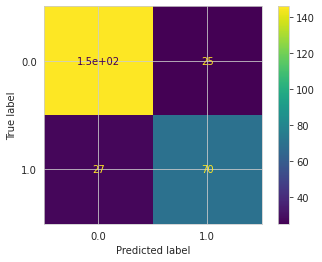

In [53]:
plot_confusion_matrix(lr, X_test, y_test)
plt.show()

This means we have:


*   146 true positives
*   70 true negatives
*   25 false positives
*   27 false negatives

In [52]:
print(classification_report(y_test, lr_prediction))

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       171
         1.0       0.74      0.72      0.73        97

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.81      0.81      0.81       268



**Precision** evaluates how many of our identifications were correct, this means that 84% of the times our model predicted 0 (Didn't Survive), the prediction was correct. This decreases to 74% for 1 (Survived).



**Recall**, on the other hand, evaluates the probability of a given value to be correctly predicted. This means that our model has an 85% chance of correctly predicting a casualty, and only a 72% of correctly predicting a survival.


**f1-score** corresponds to the harmonic mean of both, precision and recall, and is usually taken in account to measure a model's accuracy.

Maybe we can furtherly investigate the dataset's original features in order to wrangle the date a bit better.



Just in case you want to delve in this titanic task, you can check Kaggle and try to use the real datasets!

https://www.kaggle.com/c/titanic/overview/evaluation